In [61]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import numpy as np
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
df = pd.read_csv("data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


The data has both numerical and categorical data which means we have to encode categorical data before using ML algorithms

In [52]:
# using label encoder for 'y' output
label_encoder = LabelEncoder()

In [53]:
df['y']= label_encoder.fit_transform(df['y'])
 
df['y'].unique()

array([0, 1])

In [54]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,0
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,1
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,0


In [57]:
# using One Hot Encoder for features 'job','marital','education','default','housing','loan','contact','month'
one_hot_encoder= OneHotEncoder()

In [62]:
class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features)

In [63]:
cat_features = ['job','marital','education','default','housing','loan','contact','month']

In [64]:
one_hot_encoder = OneHotEncoderCategoricalFeatures(cat_features)
X_oho = one_hot_encoder.transform(df)
X_oho

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,76,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,92,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,30,3340,3,238,3,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39997,54,200,3,170,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,34,1047,3,342,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
one_hot_encoder = pd.get_dummies(cat_features)

In [66]:
X_oho.drop(['duration'],axis=1)

,age,balance,day,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,30,3340,3,3,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
39997,54,200,3,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,34,1047,3,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [67]:
# Dropping 'duration' column as it does not seem very significant to overall data
X = X_oho.drop(['y','duration'],axis=1)

In [68]:
X

,age,balance,day,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,30,3340,3,3,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
39997,54,200,3,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,34,1047,3,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
y = X_oho['y']

In [70]:
y

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    1
39998    0
39999    0
Name: y, Length: 40000, dtype: int64

In [71]:
#train_set, test_set = train_test_split(X_oho, test_size=0.2, random_state=50)  
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=50)

In [72]:
print(len(y_train), len(y_test))

32000 8000


In [73]:
correlations = X_oho.corr() 
correlations['y'].sort_values(ascending=False)

y                      1.000000
duration               0.461169
month_mar              0.128125
month_apr              0.097450
month_oct              0.093298
contact_cellular       0.085433
housing_no             0.054336
marital_single         0.051721
education_tertiary     0.046763
job_student            0.037384
month_feb              0.036816
loan_no                0.031029
balance                0.030232
job_retired            0.024343
job_management         0.020291
marital_divorced       0.014619
job_unemployed         0.009463
job_admin              0.008083
default_no             0.006559
job_self-employed      0.005029
month_dec              0.000315
job_technician         0.000234
job_unknown           -0.000018
contact_telephone     -0.000842
day                   -0.006420
default_yes           -0.006559
job_entrepreneur      -0.007191
education_unknown     -0.007464
month_nov             -0.013654
month_jun             -0.014557
job_services          -0.014645
job_hous

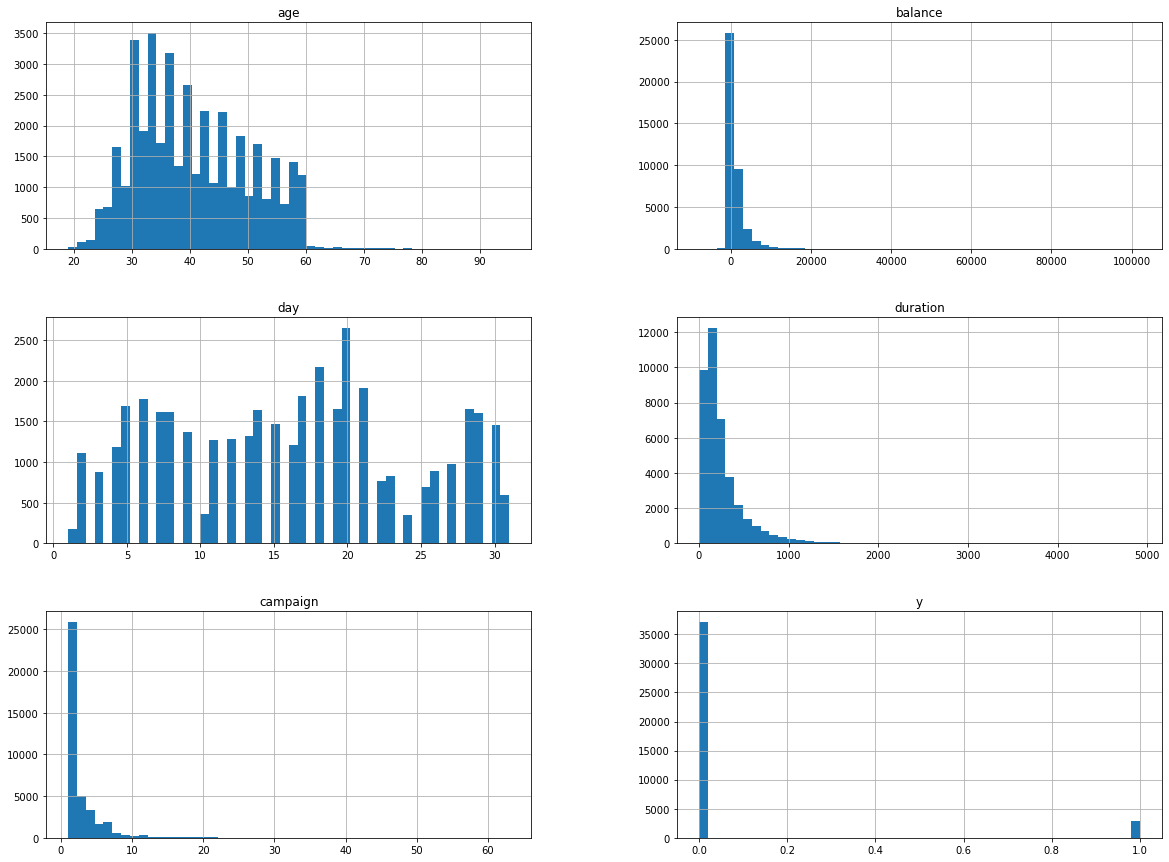

In [74]:
_ = df.hist(bins=50, figsize=(20,15))

In [75]:
clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=60)

In [76]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [77]:
print("Accuracy:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.01322314049586777
